# Evaluation of a Binary Classification Model

In [45]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv('winequality-white.csv', sep=';')

In [47]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [49]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

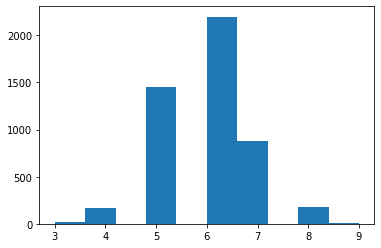

In [50]:
plt.hist(data['quality'])

Quality is a categorial feature

In [51]:
X = data[data.columns[:-1]].values
y = data['quality'].values

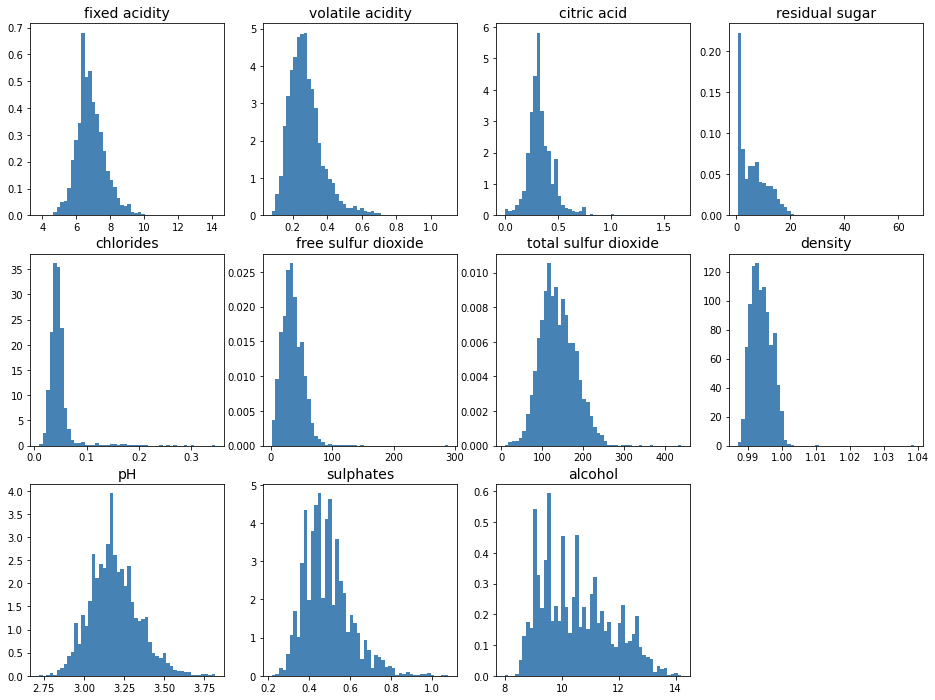

In [52]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

Nice distributions, but some features need to be scaled to be coherent

In [53]:
y_class = np.where(y<6, 0, 1)

In [54]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=0.3)

In [55]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

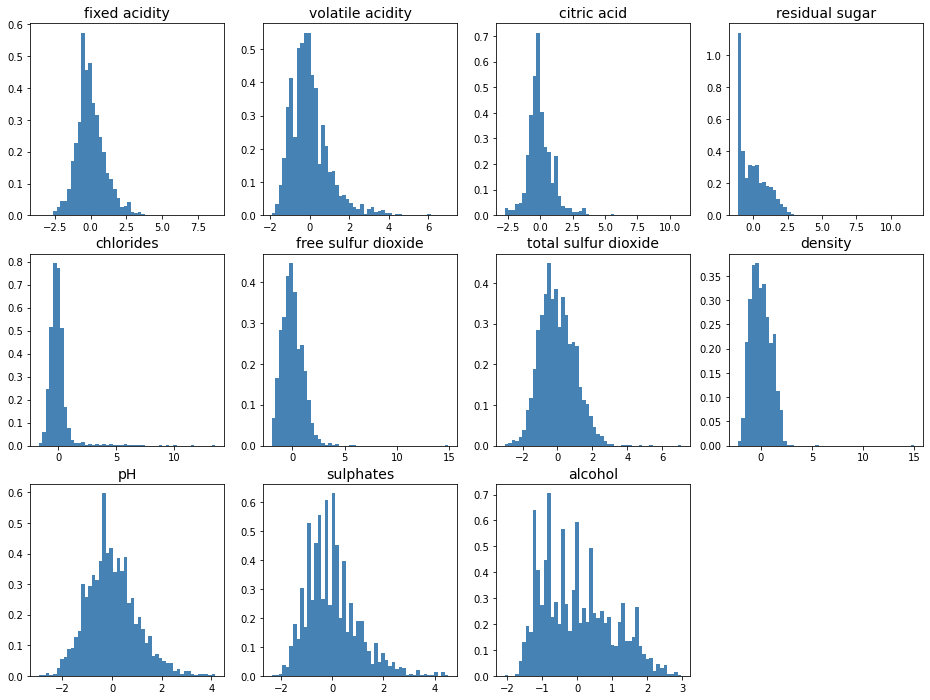

In [56]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

Better scaling, now we can start modelizing

In [57]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 7}
Résultats de la validation croisée :
accuracy = 0.952 (+/-0.002) for {'n_neighbors': 3}
accuracy = 0.959 (+/-0.008) for {'n_neighbors': 5}
accuracy = 0.961 (+/-0.007) for {'n_neighbors': 7}
accuracy = 0.961 (+/-0.004) for {'n_neighbors': 9}
accuracy = 0.961 (+/-0.003) for {'n_neighbors': 11}
accuracy = 0.961 (+/-0.003) for {'n_neighbors': 13}
accuracy = 0.961 (+/-0.004) for {'n_neighbors': 15}


In [58]:
clf.cv_results_

{'mean_fit_time': array([0.00229497, 0.00232821, 0.00266728, 0.00256   , 0.00232778,
        0.00232358, 0.0023623 ]),
 'std_fit_time': array([1.80986456e-04, 1.93244246e-04, 4.52293168e-04, 1.42282855e-04,
        9.98476515e-05, 3.26340607e-05, 1.49868743e-04]),
 'mean_score_time': array([0.02376714, 0.02726488, 0.03000259, 0.02974534, 0.0292377 ,
        0.02989988, 0.03078556]),
 'std_score_time': array([0.00131542, 0.0012466 , 0.00145758, 0.00102434, 0.00098066,
        0.00116126, 0.00086113]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.95189504, 0.95189504, 0.95772595, 0.95772595, 0.9606414 ,
        0.9606414 , 0.9606414 ]),
 'split1_test_s

In [59]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.965


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   1,   44],
       [   8, 1417]])

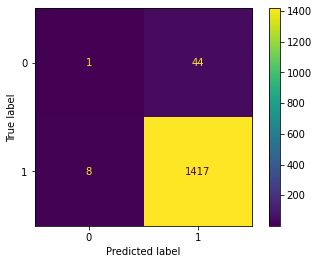

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='viridis')
plt.show()

Metrics can be provided from the confusion matrix

>
>Appelons "positive" la classe correspondant à un incendie et "négative" l’autre.
>Si on prédit un incendie quand il y en a bien un, on fait une prédiction "positif" qui est correcte, c’est un vrai positif.
>Si par contre cette prédiction est incorrecte, il s’agit d’un faux positif. Et ainsi de suite.
>On appelle aussi parfois "erreur de type I" les faux positifs, et "erreur de type II" les faux négatifs.


![](assets/confusion_matrix.png)

Useful metrics:

ratio of true positives: $ Sensivity (or Recall) = \frac{TP}{TP+FN} $

> La proportion de positifs que l’on a correctement identifiés.
> C’est la capacité de notre modèle à détecter tous les incendies

ration of correct predictions: $ Precision = \frac{TP}{TP+FP} $

> La proportion de prédictions correctes parmi les points que l’on a prédits positifs.
> C’est la capacité de notre modèle à ne déclencher d’alarme que pour un vrai incendie.

to evaluate a compromise between recall and precision, we use: $ F1 = 2 * \frac{Precision . Recall}{Precision + Recall} $

Note : this is the harmonic mean


ration of true negatives: $ Specificity = \frac{TN}{TN+FP} $


#### Sum-up

> Sensibility = ratio of True Positives (TP/P)
>
> Anti-Specificity = 1 - Specificity = ratio of False Positives (FP/P)



> La capacité à détecter toutes les  situations où il n’y a pas d’incendie.
> C’est une mesure complémentaire de la sensibilité

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.9943859649122807

In [63]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9698836413415469

In [64]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_test, y_pred)

(array([0.96938776, 0.96988364, 1.        ]),
 array([1.        , 0.99438596, 0.        ]),
 array([0, 1]))

## Case of Model returning real values

Comes from [https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308261-evaluez-un-algorithme-de-classification-qui-retourne-des-scores]()

Above the model was returning boolean values, but how to evaluate a model that results in a variety of predictions ?

In that case, we calculate Sensitivity and Specificity for each threshold given to our model.

eg. if the model can predict values from 1..6, we'll set the category threshold to 1, 2, 3, ...6  and check what's the Sensitivity and Specificity for each.

Next, we describe them in a diagram, the 'ROC curve' (Receiver-Operator-Characteristic)

<!-- ![](assets/ROC-curve-explained.png) -->

### Sum-up

![](assets/ROC-classifier.png)

very usefull resources :

[https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3]()
[https://towardsdatascience.com/demystifying-roc-curves-df809474529a]()

[PDF version](assets/How%20to%20select%20Performance%20Metrics%20for%20Classification%20Models%20_%20by%20Ruchi%20Toshniwal%20_%20Analytics%20Vidhya%20_%20Medium.pdf)

se also wikipedia page:

[https://en.wikipedia.org/wiki/Receiver_operating_characteristic?oldformat=true]()

[https://en.wikipedia.org/wiki/Confusion_matrix]()

## PR vs ROC curves:

from [https://towardsdatascience.com/on-roc-and-precision-recall-curves-c23e9b63820c]()

the perfect classifier

![](assets/theperfectclassifier.png)

a real classifier

![](assets/realclassifier.png)

In [65]:
clf.predict_proba(X_test_std)

array([[0.        , 1.        ],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

Text(0.5, 1.0, 'ROC curve')

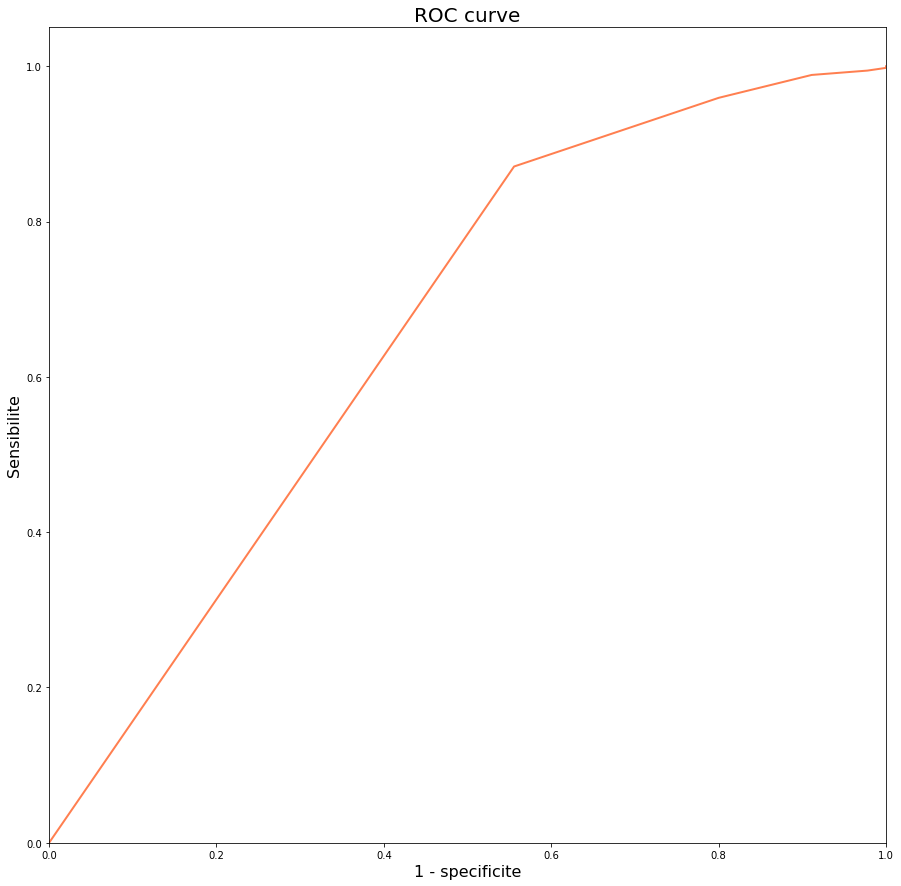

In [66]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=16)
plt.ylabel('Sensibilite', fontsize=16)
plt.title('ROC curve', fontsize=20)

AUROC = Area Under the ROC

C'est l'aire sous la courbe ROC. qui permet de comparer des modeles


[https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3]()

Let us see all the metrics that can be derived from confusion matrix and when to use them:

#### Accuracy — Ratio of correct predictions to total predictions.
Important when: you have symmetric datasets (FN & FP counts are close)
Used when: false negatives & false positives have similar costs.

$ Accuracy = \frac{(TP+TN)}{(TP+FP+FN+TN)} $

#### Sensitivity / Recall / Hit Rate (TPR True Positive Rate) — Ratio of true positives to total (actual) positives in the data.
Important when: identifying the positives is crucial.
Used when: the occurrence of false negatives is unacceptable/intolerable. You’d rather have some extra false positives (false alarms) over saving some false negatives. For example, when predicting financial default or a deadly disease.

Sensitivity or $ Recall = \frac{TP}{(TP+FN)} $

#### Precision — Ratio of true positives to total predicted positives.
Important when: you want to be more confident of your predicted positives.
Used when: the occurrence of false positives is unacceptable/intolerable. For example, Spam emails. You’d rather have some spam emails in your inbox than miss out some regular emails that were incorrectly sent to your spam box.

$ Precision = \frac{TP}{(TP+FP)} $

#### Specificity (TNR True Negative Rate) — Ratio of true negatives to total negatives in the data.
Important when: you want to cover all true negatives.
Used when: you don’t want to raise false alarms. For example, you’re running a drug test in which all people who test positive will immediately go to jail.

$ Specificity = \frac{TN}{(TN+FP)} = 1 - FPR$

#### F1-Score — Considers both precision and recall. It’s the harmonic mean of the precision and recall.
Important when: you have an uneven class distribution.
Used when: the cost of false positives and false negatives are different. F1 score conveys the balance between the precision and the recall. It is higher if there is a balance between Precision and Recall. F1 Score isn’t so high if one of these measures, Precision or Recall, is improved at the expense of the other.

$ F1 Score = 2* \frac{(Recall * Precision)}{(Recall + Precision)} $

Notice that each one of these is defined in such a way that they capture different aspects of a model’s performance. When we are choosing one of these metrics to improve our model on, we need to keep in mind:
* The problem that we are trying to solve
* The dataset that we have with us (prevalence of each class in the data)
* The cost that we have to pay for either types of misclassifications (false positives and false negatives)

#### False Positive Rate FPR / Fall-out - Ratio of negative events wrongly categorized as positive
$ FPR = \frac{FN}{FP + TN} = 1 - TNR $